<a href="https://colab.research.google.com/github/kuberiitb/learnings/blob/master/dl_pytorch/03_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on [PyTorch Tutorial 07 - Linear Regression](https://www.youtube.com/watch?v=YAJ5XBwlN4o) video of [playlist](https://www.youtube.com/playlist?list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4)

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Make data for regression

In [4]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=100)

In [34]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

In [35]:
y[:10]

tensor([[ 16.1746],
        [-65.9969],
        [-70.3073],
        [ 41.8237],
        [-65.0504],
        [  3.7563],
        [ 14.1827],
        [ 85.1604],
        [-77.8749],
        [-47.7083]])

In [36]:
n_rows, n_features = X.shape
print(n_rows, n_features)

100 1


In [37]:
input_size = n_features
output_size = 1

In [57]:
model = nn.Linear(input_size, output_size)
print(input_size, output_size)

1 1


In [58]:
learning_rate=0.1
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [68]:
EPOCHS = 20
loss_list = []

for epoch in range(EPOCHS):
  y_pred = model(X)
  optimizer.zero_grad()
  loss = criterion(y_pred, y)
  loss.backward()
  optimizer.step()
  print(f"Epoch {epoch} Loss {loss}")
  loss_list.append(loss)

Epoch 0 Loss 488.65057373046875
Epoch 1 Loss 488.5063171386719
Epoch 2 Loss 488.4088134765625
Epoch 3 Loss 488.34295654296875
Epoch 4 Loss 488.29840087890625
Epoch 5 Loss 488.2681884765625
Epoch 6 Loss 488.24774169921875
Epoch 7 Loss 488.23382568359375
Epoch 8 Loss 488.2244567871094
Epoch 9 Loss 488.218017578125
Epoch 10 Loss 488.2137145996094
Epoch 11 Loss 488.21075439453125
Epoch 12 Loss 488.208740234375
Epoch 13 Loss 488.20733642578125
Epoch 14 Loss 488.2064514160156
Epoch 15 Loss 488.2057800292969
Epoch 16 Loss 488.20538330078125
Epoch 17 Loss 488.2051086425781
Epoch 18 Loss 488.2049255371094
Epoch 19 Loss 488.2047119140625


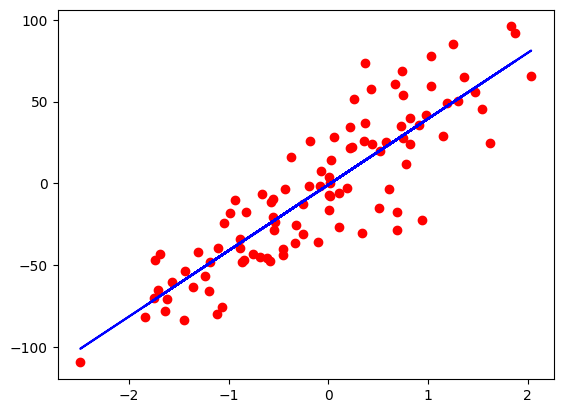

In [67]:
predicted = model(X).detach().numpy()

plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

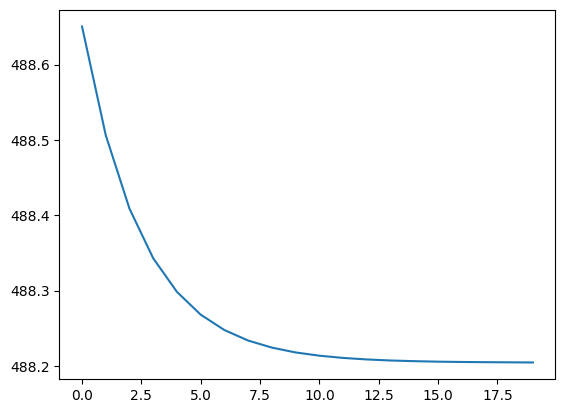

In [84]:
loss_array = np.array([x.detach() for x in loss_list])
epoch_array = np.array(range(len(loss_array)))
plt.plot(epoch_array, loss_array)
plt.show()
